### Conditional Heteroskedasticity

금융시장의 이분산성에 대해 이해하고 고급 시계열 분석 방법에 대해 배우도록 한다

#### 1. Stationaity and Heteroskedasticity

**1.1 Stationarity**

AR process의 기본 가정은 다음과 같다

- strict stationarity
    - 임의의 자연수 $t_1, t_2, \cdots, t_n$과 자연수 k에 대하여 n개의 확률변수에 대한 결합확률밀도함수와, 이 n개의 확률변수에서 k만큼의 시간 축을 이동하였을 때의 결합확률밀도함수가 동일하다면, 이 시계열은 강정상성(Strict Stationarity)를 갖는다
    - 따라서 어떤 확률과정이 강정상성 조건을 만족한다면 모든 n에 대하여 결합확률밀도함수가 시간대를 바꾸어도 동일하다는 것을 보여야 하므로, 어떠한 시간대이든 분포가 항상 동일해야 한다

- weak stationarity
    - 확률과정이 유한한 2차 적률(**Finite Second Moment**)을 갖고, 기댓값과 분산이 시점 t와 무관하게 항상 일정하며 자기공분산이 시점 t가 아닌 시차 k에 의존한다면 이를 약한 의미의 정상성을 갖는다
    - $\mathrm{E}(Z_t) = \mu,~~ \mu \in \mathbf{R}$
    - $\mathrm{Var}(Z_t) = \sigma ^ 2, ~~ \sigma ^ 2 \in \mathbf{R}$
    - $\mathrm{Cov}(Z_t, Z_{t+k}) = \sigma_K, ~~\mathrm{for~any~t,h \geq 1}$

즉 금융 데이터(여기서 보통 1차 차분한 데이터를 의미한다)가 weak stationary 하다면, 그 데이터를 제곱한 수와 절대값을 취한 수 또한 weak stationary의 가정을 만족해야 한다. 그러나, 실제로 데이터에 변형을 취하면 자산가격은 weak stationarity를 보이지 않는다

In [7]:
import pandas_datareader as pdr
import datetime
import numpy as np
import pandas as pd

start_date = datetime.datetime(2020, 1, 1)
end_date = datetime.datetime(2023, 1, 1)

kosdaq = pdr.DataReader("KOSDAQ", "naver", start_date, end_date).astype(float)
kosdaq

,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,672.53,674.30,666.62,674.02,783730.0
2020-01-03,677.57,679.37,668.10,669.93,903858.0
2020-01-06,660.08,663.10,653.61,655.31,884278.0
2020-01-07,660.87,664.21,659.18,663.44,970306.0
2020-01-08,657.24,658.14,637.43,640.94,1379708.0
...,...,...,...,...,...
2022-12-23,704.93,704.93,691.25,691.25,1107302.0
2022-12-26,691.94,696.96,686.80,694.68,797707.0
2022-12-27,697.25,704.21,697.25,704.19,901437.0


In [8]:
ret = np.log(kosdaq.Close / kosdaq.Close.shift(1)).dropna()
ret

Date
2020-01-03   -0.006087
2020-01-06   -0.022065
2020-01-07    0.012330
2020-01-08   -0.034503
2020-01-09    0.038489
                ...   
2022-12-23   -0.033809
2022-12-26    0.004950
2022-12-27    0.013597
2022-12-28   -0.016928
2022-12-29   -0.019072
Name: Close, Length: 741, dtype: float64

weak stationary 가정을 만족하는지 보여주기 위해서 다음과 같은 자산 가격 시계열을 새롭게 생성한다

In [9]:
ret_square = ret ** 2
ret_abs = np.abs(ret)

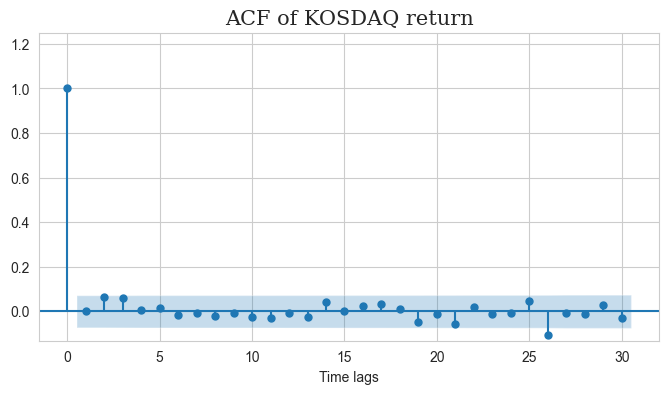

In [12]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(8, 4))
plot_acf(ret, auto_ylims = True, lags = 30, title = 'ACF of KOSDAQ return' , ax = ax)
plt.xlabel('Time lags', fontsize = 10)
plt.title('ACF of KOSDAQ return', fontsize = 15, fontfamily = 'Serif')
plt.show()

1차 차분한 수익률 벡터에 대해서는 위와 같이 안정성을 띄는 것을 볼 수 있다

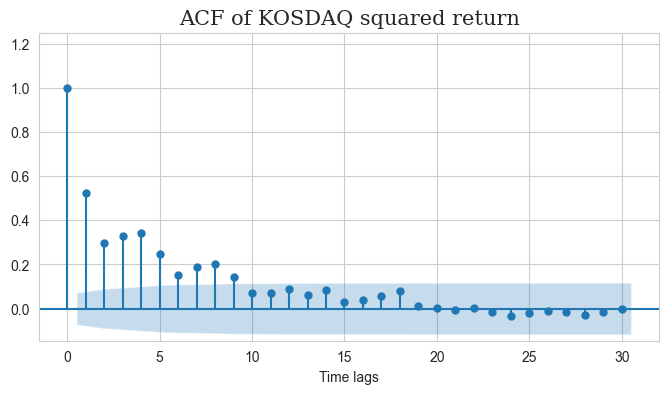

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_acf(ret_square, auto_ylims = True, lags = 30, title = 'ACF of KOSDAQ return' , ax = ax)
plt.xlabel('Time lags', fontsize = 10)
plt.title('ACF of KOSDAQ squared return', fontsize = 15, fontfamily = 'Serif')
plt.show()

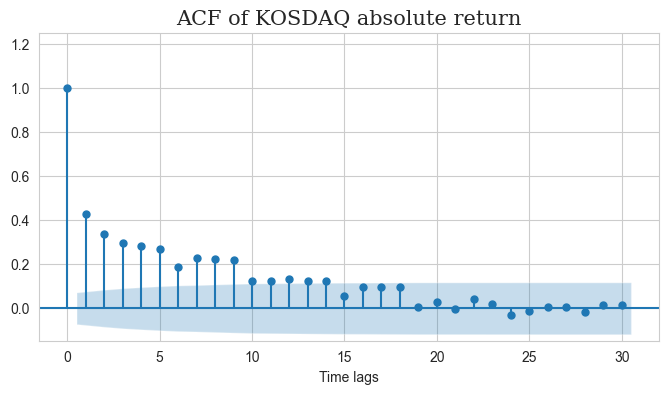

In [14]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_acf(ret_abs, auto_ylims = True, lags = 30, title = 'ACF of KOSDAQ return' , ax = ax)
plt.xlabel('Time lags', fontsize = 10)
plt.title('ACF of KOSDAQ absolute return', fontsize = 15, fontfamily = 'Serif')
plt.show()

그러나, 각각 수익률의 제곱과 절대값은 안정적이지 않다. 따라서, 대부분의 금융 시계열 데이터는 IID 가정을 만족시키지 못한다는 것을 알 수 있다.

이것이 우리가 금융 시계열 데이터에서 이분산성을 고려해야 하는 이유이다

**1.2 Characteristics of Volatility**

주식 변동성의 특별한 특징은 직접 관측할 수 없다는 것이다. 그러나 변동성은 직접적으로 관찰할 수는 없지만 자산 수익률에서 흔히 볼 수 있는 몇 가지 특징을 가지고 있다.

1. 변동성 군집이 존재한다. 즉, 특정 기간에는 변동성이 높고 다른 기간에는 낮을 수 있다
2. 변동성은 시간이 지남에 따라 지속적인 방식으로 진화한다. 즉, 변동성의 널뛰기 현상은 드물다
3. 변동성이 무한대로 발산되지 않는다. 즉, 변동성은 일정한 범위 내에서 변동성이 변한다는 것이다. 통계적으로 말하면 변동성은 종종 정지해 있다는 것을 의미한다
4. 넷째, 변동성은 레버리지 효과로 일컬어지는 큰 가격 상승이나 큰 가격 하락에 다르게 반응하는 것으로 보인다. 이러한 속성들은 변동성 모형의 발전에 중요한 역할을 한다

일부 변동성 모형은 앞서 언급한 특징을 포착하지 못해 기존 모형의 약점을 보완하기 위해 구체적으로 제안되었다. 예를 들어, EGARCH 모형은 큰 긍정적인 자산 수익률과 부정적인 자산 수익률이 유발하는 변동성의 비대칭성을 포착하기 위해 개발되었다